Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Subsest of colums used for example: LotArea	OverallQual	YearBuilt	RoofStyle	CentralAir	SalePrice.

Data are interpreted as continuos and categorical variables


In [1]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# reading given data and visualizing it
df = pd.read_csv("../data/mixedDataExample.tsv",sep='\t')
df.head()

,LotArea,OverallQual,YearBuilt,RoofStyle,CentralAir,SalePrice
0,8450,7,2003,Gable,Y,208500
1,9600,6,1976,Gable,Y,181500
2,11250,7,2001,Gable,Y,223500
3,9550,7,1915,Gable,Y,140000
4,14260,8,2000,Gable,Y,250000


----
LotArea (numeric / continuous) - ...

OverallQual (numeric / continuous - ???) - 

YearBuilt (numeric / continuous - ???) - ...

RoofStyle (categorical / categorical) - ...

CentralAir (categorical / categorical) - ...

Target: SalePrice (numeric / continuous) -

----

***LotArea***

array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

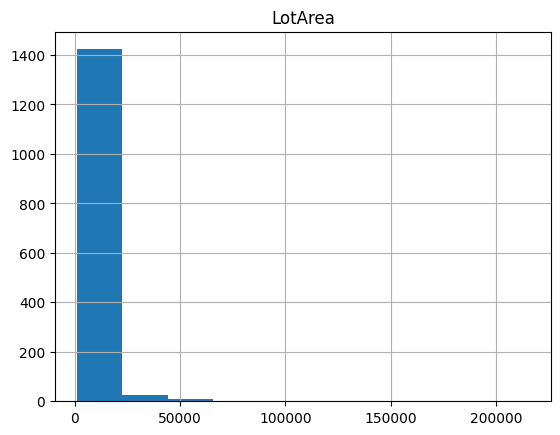

In [4]:
# LotaArea analysis
df.hist(column=['LotArea'])

<AxesSubplot:>

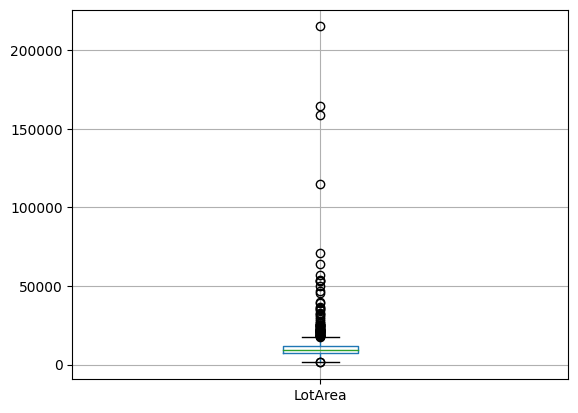

In [5]:
df.boxplot(column=['LotArea'])

There are several options how to fix data. 
   * remove entire records with outlier from dataset
   * assign valid upper bound value to the outliers (clamp transformation)
   * other
   
The option can be selected based on the practice and logical insigts, but at scrupulous scenario many options can be analysed and the most appropriate one selected.

In [6]:
# let's use the clamp transformation in this example  

Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

upperFilter = (df['LotArea'] >= Q3 + 1.5 *IQR)
lowerFilter = (df['LotArea'] <= Q1 - 1.5 *IQR)
df.loc[upperFilter,['LotArea']]  = Q3 + 1.5 *IQR
df.loc[lowerFilter,['LotArea']]  = Q1 - 1.5 *IQR

It must be noted, that same transformation must be applied to the original model, before passing the new data instance to decision making model.

Also, in real life applications, an option should be considered to perform data validation and inform user or forward exception, that in case of outliers data prediction model may work inapropriate.


array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

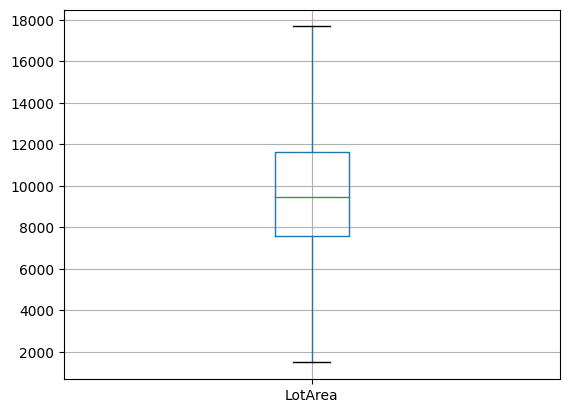

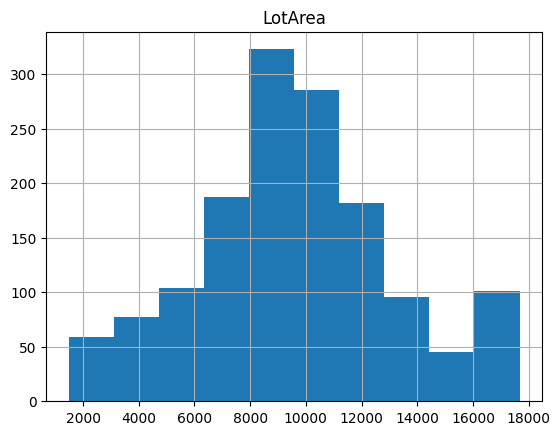

In [7]:
df.boxplot(column=['LotArea'])
df.hist(column=['LotArea'])

<AxesSubplot:>

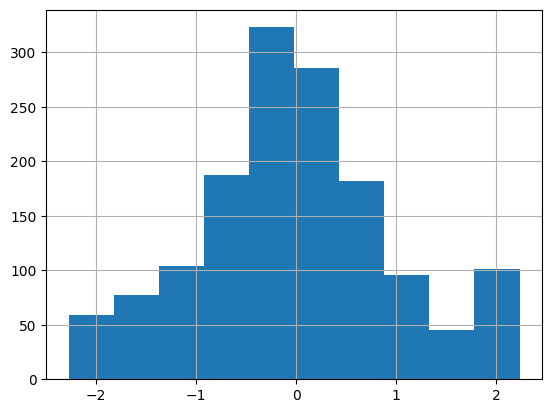

In [8]:
standartizedDf=(df['LotArea']-df['LotArea'].mean())/df['LotArea'].std()
standartizedDf.hist()

Normalized

<AxesSubplot:>

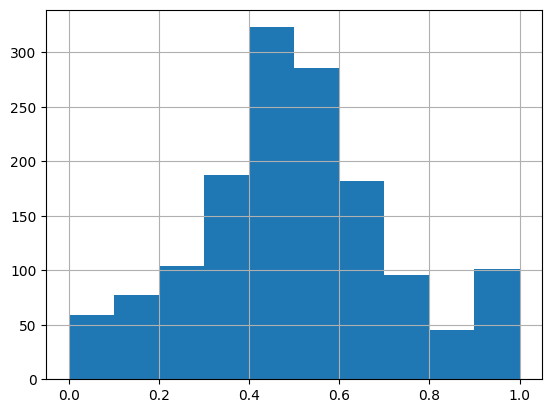

In [9]:
normalizedDf=(df['LotArea']-df['LotArea'].min())/(df['LotArea'].max()-df['LotArea'].min())
normalizedDf.hist()

***`OverallQual`***

   OverallQual  counts
0            1       2
1            2       3
2            3      20
3            4     116
4            5     397
5            6     374
6            7     319
7            8     168
8            9      43
9           10      18
            LotArea  OverallQual    YearBuilt      SalePrice
count   1460.000000  1460.000000  1460.000000    1460.000000
mean    9647.388014     6.099315  1971.267808  180921.195890
std     3594.356399     1.382997    30.202904   79442.502883
min     1481.500000     1.000000  1872.000000   34900.000000
25%     7553.500000     5.000000  1954.000000  129975.000000
50%     9478.500000     6.000000  1973.000000  163000.000000
75%    11601.500000     7.000000  2000.000000  214000.000000
max    17673.500000    10.000000  2010.000000  755000.000000


<AxesSubplot:title={'center':'SalePrice'}, xlabel='OverallQual'>

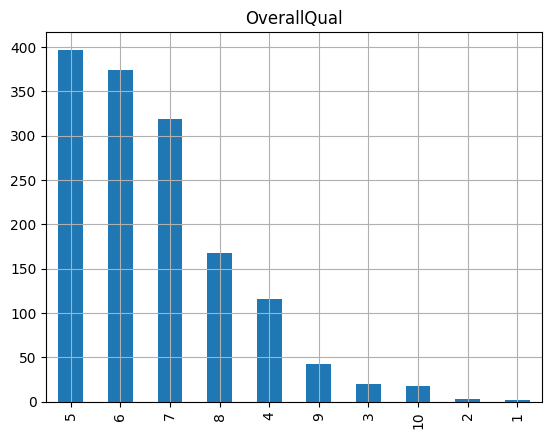

<Figure size 640x480 with 0 Axes>

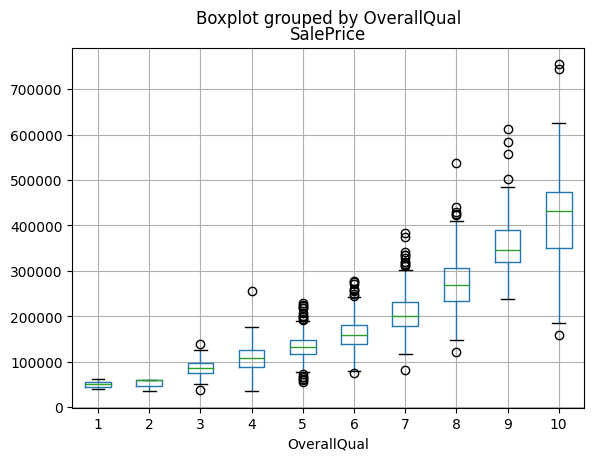

In [10]:
values = df['OverallQual'].value_counts()
values.plot(kind = 'bar')
plt.title('OverallQual')
plt.grid()

print(df.groupby(['OverallQual']).size().reset_index(name = 'counts'))
print(df.describe())

fig = plt.figure()
df.boxplot(column = 'SalePrice', by = 'OverallQual')


TODO:
*   Make analysis of the rest variables
*   Perform data limitation / model limitation report.
*   Fill Data quality reports


